パラメトリック固有空間法を実装する。位置・姿勢 / 文字種と傾きと文字の太さ。真値をどの程度正しく推定できるであろうか。教師となる信号はどのくらいの数を必要とするであろうか。

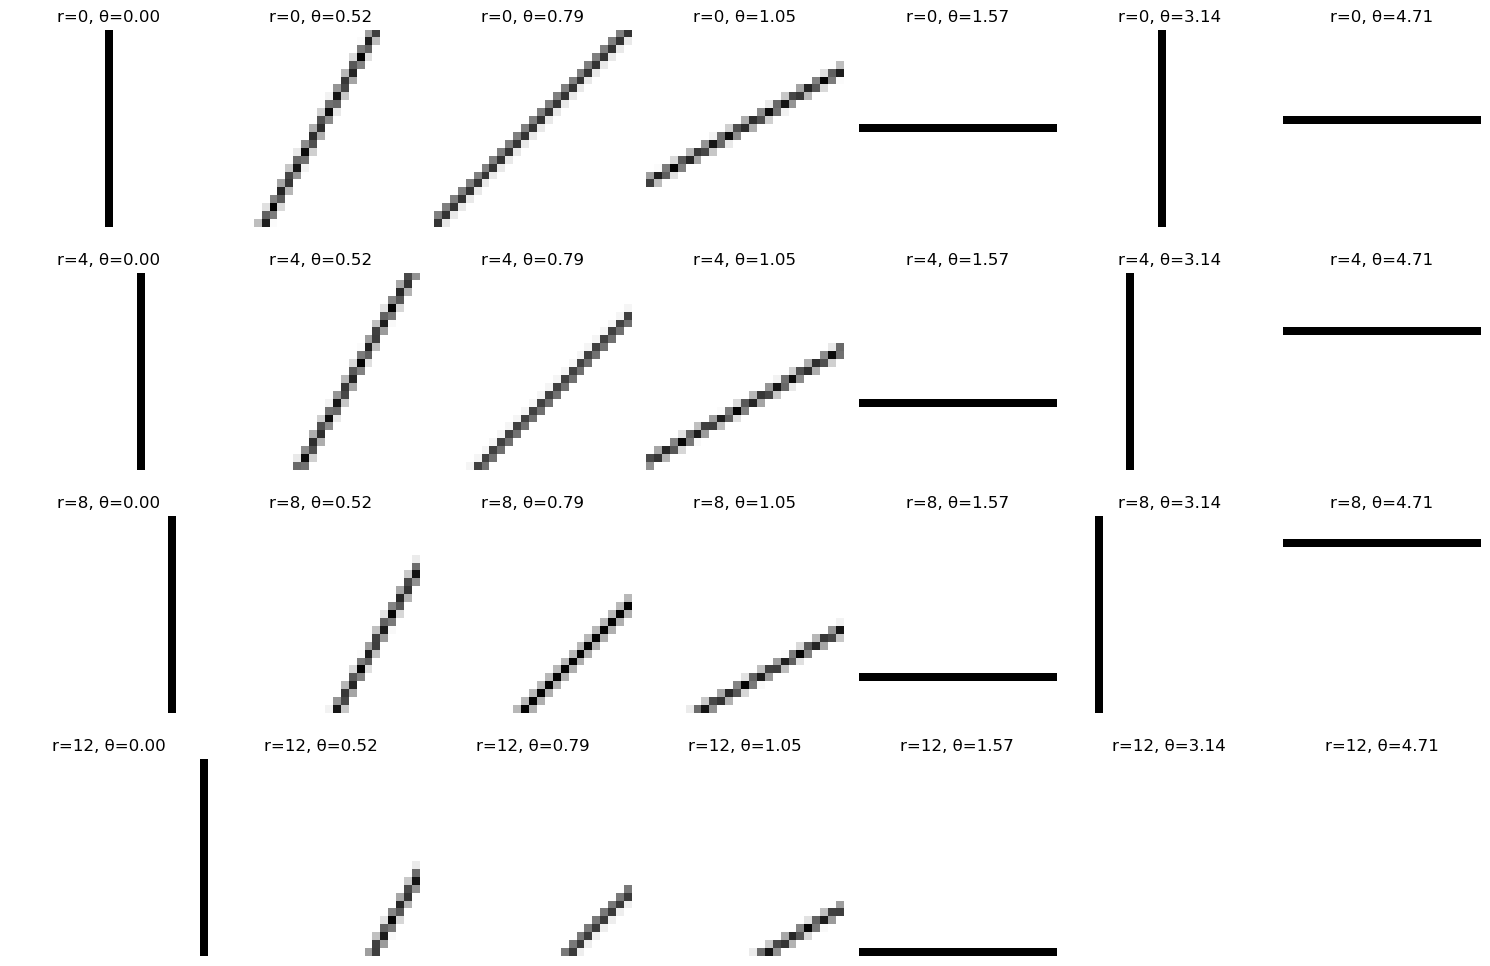

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def generate_image(r, theta):
    # 49x49の真っ白な画像を生成（255: 白, 0: 黒）
    img_size = 49
    large_img = np.full((img_size, img_size), 255, dtype=np.uint8)
    
    # 中央に縦線を描く（黒: 0）
    center = img_size // 2
    large_img[:, center] = 0

    # 並進 (右に循環)
    large_img = np.roll(large_img, shift=r, axis=1)
    
    # 回転
    img = Image.fromarray(large_img)
    img = img.rotate(-np.degrees(theta), resample=Image.BILINEAR, center=(center, center))
    
    # 回転後の画像をnumpy配列に変換
    rotated_img = np.array(img)
    
    # 中央の25x25マスを切り抜き
    small_center = img_size // 2
    output_size = 25
    start = small_center - output_size // 2
    end = start + output_size
    small_img = rotated_img[start:end, start:end]
    
    return small_img

# 確認用の画像を出力
def visualize_results():
    r_values = [0, 4, 8, 12]
    theta_values = [0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi, 3*np.pi/2]

    fig, axes = plt.subplots(len(r_values), len(theta_values), figsize=(15, 10))

    for i, r in enumerate(r_values):
        for j, theta in enumerate(theta_values):
            img = generate_image(r, theta)
            axes[i, j].imshow(img, cmap='gray', vmin=0, vmax=255)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"r={r}, θ={theta:.2f}")

    plt.tight_layout()
    plt.show()

# 結果を可視化
visualize_results()
